In [1]:
#!pip3 install pandas
#!pip3 install sklearn
#!pip3 install torch

In [2]:
import pandas as pd
import numpy as np
import pickle
import math

In [3]:
lat_file="./data/CA_GRACE_DA/csv/LAT.csv"
lon_file="./data/CA_GRACE_DA/csv/LON.csv"
lat_df=pd.read_csv(lat_file)
print(f"Latitude shape {lat_df.shape}")
lon_df=pd.read_csv(lon_file)
print(f"longitutde shape {lon_df.shape}")
print("latitude data")
print(lat_df.to_numpy(copy=True))
print("longitude data")
print(lon_df.to_numpy(copy=True))


Latitude shape (33, 37)
longitutde shape (33, 37)
latitude data
[[42.565 42.565 42.565 ... 42.565 42.565 42.565]
 [42.185 42.185 42.185 ... 42.185 42.185 42.185]
 [41.808 41.808 41.808 ... 41.808 41.808 41.808]
 ...
 [31.956 31.956 31.956 ... 31.956 31.956 31.956]
 [31.625 31.625 31.625 ... 31.625 31.625 31.625]
 [31.295 31.295 31.295 ... 31.295 31.295 31.295]]
longitude data
[[-125.66 -125.29 -124.92 ... -112.97 -112.59 -112.22]
 [-125.66 -125.29 -124.92 ... -112.97 -112.59 -112.22]
 [-125.66 -125.29 -124.92 ... -112.97 -112.59 -112.22]
 ...
 [-125.66 -125.29 -124.92 ... -112.97 -112.59 -112.22]
 [-125.66 -125.29 -124.92 ... -112.97 -112.59 -112.22]
 [-125.66 -125.29 -124.92 ... -112.97 -112.59 -112.22]]


In [4]:
objects = []
with (open("all_data.pkl", "rb")) as openfile:
    while True:
        try:
            objects.append(pickle.load(openfile))
        except EOFError:
            break

In [5]:
print(str(len(objects)))
pdata=objects[0]

1


In [6]:
pdata.shape

(168, 20)

In [7]:
pdata.head()

,Year,Month,SCA,Landsat_Image,BW_SCA_Image,Color_SCA_Image,catdef,rzexc,evap,srfexc,sfmc,capac,Snowf,Rainf,prmc,sumwesn,runoff,Tair,RainfC,rzmc
0,2003,1,294585,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 38.347, 58.863, 72.956, 104.4...","[[nan, nan, nan, 2.8021, 3.8333, 3.6458, 2.835...","[[nan, nan, nan, 1.9842, 1.8075, 1.1867, 1.024...","[[nan, nan, nan, -0.25451, -0.26739, -0.30132,...","[[nan, nan, nan, 0.45009, 0.41456000000000004,...","[[nan, nan, nan, 0.07147200000000001, 0.069579...","[[nan, nan, nan, 0.0, 4.0366999999999995e-05, ...","[[nan, nan, nan, 9.8164, 9.1992, 7.3516, 5.421...","[[nan, nan, nan, 0.46491000000000005, 0.42658,...","[[nan, nan, nan, 1.9386e-05, 0.00053811, 0.009...","[[nan, nan, nan, 7.8125, 7.9023, 6.6211, 3.629...","[[nan, nan, nan, 284.14, 283.06, 281.55, 281.1...","[[nan, nan, nan, 0.12506, 0.12585, 0.10165, 0....","[[nan, nan, nan, 0.47278000000000003, 0.442019..."
1,2003,2,19185627,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 54.951, 79.32600000000001, 90...","[[nan, nan, nan, 1.7583, 1.871, 1.7959, 1.2065...","[[nan, nan, nan, 2.3223, 1.939, 1.5134, 1.5090...","[[nan, nan, nan, -0.48801000000000005, -0.486,...","[[nan, nan, nan, 0.43295, 0.39828, 0.36313, 0....","[[nan, nan, nan, 0.067444, 0.10471, 0.092987, ...","[[nan, nan, nan, 0.027298000000000003, 0.04013...","[[nan, nan, nan, 4.377, 4.3574, 3.7314, 2.8877...","[[nan, nan, nan, 0.45143, 0.40968999999999994,...","[[nan, nan, nan, 0.0026054000000000003, 0.0053...","[[nan, nan, nan, 3.4277, 3.8438, 3.5537, 2.386...","[[nan, nan, nan, 281.02, 279.66, 278.21, 278.1...","[[nan, nan, nan, 0.35803, 0.32971, 0.230590000...","[[nan, nan, nan, 0.45508000000000004, 0.42786,..."
2,2003,3,39522095,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 58.096000000000004, 80.846, 9...","[[nan, nan, nan, 3.0619, 3.3489999999999998, 2...","[[nan, nan, nan, 2.252, 2.0894, 1.7779, 1.9288...","[[nan, nan, nan, -0.28013000000000005, -0.2856...","[[nan, nan, nan, 0.43599, 0.40242, 0.365309999...","[[nan, nan, nan, 0.059937, 0.09848, 0.10797000...","[[nan, nan, nan, 0.00029898, 0.001753300000000...","[[nan, nan, nan, 8.875, 8.3047, 6.4688, 5.0547...","[[nan, nan, nan, 0.45028, 0.40975, 0.3652, 0.3...","[[nan, nan, nan, 1.5571999999999999e-06, 9.130...","[[nan, nan, nan, 5.7129, 5.6113, 4.375, 2.9229...","[[nan, nan, nan, 282.26, 281.13, 279.84, 279.9...","[[nan, nan, nan, 0.31006, 0.2572, 0.17047, 0.1...","[[nan, nan, nan, 0.4537, 0.42867, 0.38632, 0.3..."
3,2003,4,53739475,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 50.902, 74.34, 89.059, 98.902...","[[nan, nan, nan, 3.2247, 3.7618, 3.4259, 2.673...","[[nan, nan, nan, 2.4907, 2.2066, 2.021, 2.1504...","[[nan, nan, nan, -0.1607, -0.14800000000000002...","[[nan, nan, nan, 0.44292, 0.40849, 0.3726, 0.3...","[[nan, nan, nan, 0.079956, 0.12982, 0.19555999...","[[nan, nan, nan, 0.38354, 0.65161, 0.88013, 0....","[[nan, nan, nan, 8.6953, 8.5234, 7.334, 6.5078...","[[nan, nan, nan, 0.45588, 0.41511000000000003,...","[[nan, nan, nan, 0.074188, 0.14722000000000002...","[[nan, nan, nan, 6.0234, 6.3164, 5.4961, 4.298...","[[nan, nan, nan, 280.85, 279.66, 278.47, 278.7...","[[nan, nan, nan, 0.68433, 0.58594, 0.42126, 0....","[[nan, nan, nan, 0.46101000000000003, 0.43318,..."
4,2003,5,46363941,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 77.083, 103.3, 112.11, 113.8,...","[[nan, nan, nan, 0.016929, -0.53873, -0.45475,...","[

In [8]:
pdata.tail()

,Year,Month,SCA,Landsat_Image,BW_SCA_Image,Color_SCA_Image,catdef,rzexc,evap,srfexc,sfmc,capac,Snowf,Rainf,prmc,sumwesn,runoff,Tair,RainfC,rzmc
163,2016,8,17512327,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 285.88, 333.63, 336.38, 361.8...","[[nan, nan, nan, -3.9957, -3.1636, -2.1148, -2...","[[nan, nan, nan, 2.2829, 1.8117, 1.4501, 1.449...","[[nan, nan, nan, -2.9419999999999997, -4.0456,...","[[nan, nan, nan, 0.20597, 0.11395999999999999,...","[[nan, nan, nan, 0.031693, 0.022636, 0.0106930...","[[nan, nan, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[nan, nan, nan, 0.19555999999999998, 0.145390...","[[nan, nan, nan, 0.27215, 0.21264, 0.17815, 0....","[[nan, nan, nan, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,...","[[nan, nan, nan, 0.0034018, 0.0017428, 0.00069...","[[nan, nan, nan, 288.92, 290.51, 292.32, 293.6...","[[nan, nan, nan, 0.00010386, 0.00016248, 0.000...","[[nan, nan, nan, 0.26896, 0.21714, 0.18156, 0...."
164,2016,9,5087669,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 331.28, 365.91, 358.28, 384.0...","[[nan, nan, nan, -1.5957, -0.9429, -0.66165, -...","[[nan, nan, nan, 1.3406, 1.0467, 0.8836, 0.825...","[[nan, nan, nan, -2.6359, -3.0539, -3.2043, -3...","[[nan, nan, nan, 0.16832, 0.11284000000000001,...","[[nan, nan, nan, 0.041504, 0.040649, 0.030525,...","[[nan, nan, nan, 0.0, 0.0, 0.0, 0.0, 3.0652e-0...","[[nan, nan, nan, 0.5219699999999999, 0.4716800...","[[nan, nan, nan, 0.2402, 0.19077, 0.1637900000...","[[nan, nan, nan, 0.0, 0.0, 0.0, 0.0, 1.5960999...","[[nan, nan, nan, 0.02076, 0.013538, 0.00923920...","[[nan, nan, nan, 288.03, 288.31, 288.63, 289.2...","[[nan, nan, nan, 0.014094999999999998, 0.01053...","[[nan, nan, nan, 0.23811999999999997, 0.193999..."
165,2016,10,594940,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 223.11, 249.48, 257.23, 310.7...","[[nan, nan, nan, 9.1253, 9.3519, 8.0082, 6.578...","[[nan, nan, nan, 2.1658, 2.1365, 1.7502, 1.607...","[[nan, nan, nan, -0.16074000000000002, -0.0286...","[[nan, nan, nan, 0.32506, 0.28734, 0.25847, 0....","[[nan, nan, nan, 0.12482, 0.16418, 0.1449, 0.1...","[[nan, nan, nan, 0.0, 0.0, 0.0, 0.0, 0.0087776...","[[nan, nan, nan, 15.375, 14.605, 12.02, 9.082,...","[[nan, nan, nan, 0.33119, 0.2881, 0.24836, 0.2...","[[nan, nan, nan, 0.0, 0.0, 0.0, 0.0, 0.0003911...","[[nan, nan, nan, 4.1367, 3.3604, 2.625, 1.5195...","[[nan, nan, nan, 285.95, 285.0, 283.98, 284.22...","[[nan, nan, nan, 1.4683, 1.4312, 1.146, 0.802,...","[[nan, nan, nan, 0.33171, 0.30241, 0.26164, 0...."
166,2016,11,51564,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 63.858999999999995, 106.34, 1...","[[nan, nan, nan, 3.6924, 4.0215, 3.4236, 3.188...","[[nan, nan, nan, 2.7493, 2.1238, 1.3541, 1.169...","[[nan, nan, nan, -0.30862, -0.36587, -0.448030...","[[nan, nan, nan, 0.43237, 0.38879, 0.339719999...","[[nan, nan, nan, 0.058334000000000004, 0.07733...","[[nan, nan, nan, 0.0, 8.052600000000001e-05, 0...","[[nan, nan, nan, 11.684000000000001, 10.265999...","[[nan, nan, nan, 0.44642, 0.39111999999999997,...","[[nan, nan, nan, 0.0, 4.1943999999999995e-07, ...","[[nan, nan, nan, 7.166, 5.3496, 3.2549, 1.4546...","[[nan, nan, nan, 284.7, 283.15, 281.4, 281.37,...","[[nan, nan, nan, 0.91333, 0.7380399999999999, ...","[[nan, nan, nan, 0.44875, 0.41115, 0.3478, 0.2..."
167,2016,12,40088,<PIL.Image.Image image mode=RGB size=480x480 a...,<PIL.Image.Image image mode=1 size=570x660 at ...,<PIL.Image.Image image mode=RGBA size=570x660 ...,"[[nan, nan, nan, 41.483999999999995, 62.265, 7...","[[nan, nan, nan, 2.2714, 3.14, 3.2687, 2.8329,.

In [9]:
columns=list(pdata.columns)


In [10]:
#pdata[pdata['Year']==2010].head()
pdata.shape

(168, 20)

In [11]:
train_data=pdata.head(n=144)
num_test=pdata.shape[0]-144
test_data=pdata.tail(n=num_test)

print(f"Assuming train is first 144 months (12 years), train data dim is {train_data.shape}")
print(f"Assuming train is last 168-144={num_test} months, train data dim is {test_data.shape}")
train_years=set(train_data['Year'].tolist())
test_years=set(test_data['Year'].tolist())
print(f"Train years : {train_years} ({len(train_years)} years)")
print(f"Test years : {test_years} ({len(test_years)} years)")



Assuming train is first 144 months (12 years), train data dim is (144, 20)
Assuming train is last 168-144=24 months, train data dim is (24, 20)
Train years : {2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014} (12 years)
Test years : {2016, 2015} (2 years)


In [12]:
pdata[['Year','Month']].head()

,Year,Month
0,2003,1
1,2003,2
2,2003,3
3,2003,4
4,2003,5


In [13]:
pdata[['Year','Month']].tail()

,Year,Month
163,2016,8
164,2016,9
165,2016,10
166,2016,11
167,2016,12


In [14]:
str(columns).replace(",","").replace("'","").replace("[","").replace("]","")

'Year Month SCA Landsat_Image BW_SCA_Image Color_SCA_Image catdef rzexc evap srfexc sfmc capac Snowf Rainf prmc sumwesn runoff Tair RainfC rzmc'

In [15]:
columns_reg=[c for c in columns if not c.endswith("_Image")]

In [16]:
data_dictionary=dict()
empty_dict_val=""
data_dictionary['Year']='year of data'
data_dictionary['Month']='month of data'
data_dictionary['SCA']='Star Camera Assembly (SCA) Precisely determines the two satellite\'s orientation by tracking them relative to the position of the stars.   https://earth.esa.int/eogateway/missions/grace'
data_dictionary['catdef']=' catchment deficit (catdef) ; The model prognostic catchment deficit (catdef) [Ducharne et al., 2000] is defined as the average depth of water that would need to be added in order to bring the catchment to saturation and is directly related to the unconfined mean groundwater table depth. https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2015WR018417'
data_dictionary['rzexc']='root-zone excess (rzexc) ; Root-zone excess (rzexc) is defined as the amount of water in the root-zone layer (0-100 cm) in excess of the water that would be present if the entire soil moisture profile were in equilibrium. https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2015WR018417 ; see also https://aimesproject.org/wp-content/uploads/2021/06/Girotto_AIMES_v2.pdf'
data_dictionary['evap']=empty_dict_val
data_dictionary['srfexc']=' Surface excess (srfexc) is similarly defined as rzexc but for the surface layer (0-5 cm) https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2015WR018417'
data_dictionary['sfmc']='Surface soil moisture content https://journals.ametsoc.org/view/journals/hydr/22/5/JHM-D-20-0228.1.xml  '
data_dictionary['capac']=empty_dict_val
data_dictionary['Snowf']=empty_dict_val
data_dictionary['Rainf']=empty_dict_val
data_dictionary['prmc']='Profile soil moisture content https://journals.ametsoc.org/view/journals/hydr/22/5/JHM-D-20-0228.1.xml'
data_dictionary['sumwesn']=empty_dict_val
data_dictionary['runoff']=empty_dict_val
data_dictionary['Tair']='??? air temperature???  https://essd.copernicus.org/preprints/essd-2020-28/essd-2020-28-manuscript-version2.pdf'
data_dictionary['RainfC']='Rain from Convection (RainfC) (paper)'
data_dictionary['rzmc']='Root-zone soil moisture content https://journals.ametsoc.org/view/journals/hydr/22/5/JHM-D-20-0228.1.xml'

# https://essd.copernicus.org/preprints/essd-2016-55/essd-2016-55.pdf
# https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2015WR018417
#https://journals.ametsoc.org/view/journals/hydr/22/5/JHM-D-20-0228.1.xml

In [17]:
from collections import defaultdict
info_dict=defaultdict(list)
for index, row in pdata.iterrows():
    for c in columns:
        info_dict['col_name'].append(c)
        the_type=str(type(row[c]))
        info_dict['col_type'].append(the_type)

        #dimensions
        if(the_type=="<class 'int'>"):
            info_dict['dim'].append("1")
        elif(the_type=="<class 'PIL.Image.Image'>"):
            info_dict['dim'].append(str(row[c].size))
        elif(the_type=="<class 'numpy.ndarray'>"):
            info_dict['dim'].append(str(row[c].shape))
        else:
            info_dict['dim'].append('na')

        #meaning/note
        if c in data_dictionary:
            info_dict['meaning'].append(data_dictionary[c])
        else:
            info_dict['meaning'].append('')
            
        #units?
        info_dict['units'].append("")
        if(c=='catdef'):
            info_dict['units'][-1]="kg/(m^(2)*h)"
    if(index==0):
        break

In [18]:
import json
#print(json.dumps(info_dict,indent=4))

In [19]:
info_df=pd.DataFrame.from_dict(info_dict)

In [20]:
from IPython.display import display, HTML
display(HTML(info_df.to_html(index=False)))

col_name,col_type,dim,meaning,units
Year,<class 'int'>,1,year of data,
Month,<class 'int'>,1,month of data,
SCA,<class 'int'>,1,Star Camera Assembly (SCA) Precisely determines the two satellite's orientation by tracking them relative to the position of the stars. https://earth.esa.int/eogateway/missions/grace,
Landsat_Image,<class 'PIL.Image.Image'>,"(480, 480)",,
BW_SCA_Image,<class 'PIL.Image.Image'>,"(570, 660)",,
Color_SCA_Image,<class 'PIL.Image.Image'>,"(570, 660)",,
catdef,<class 'numpy.ndarray'>,"(33, 37)","catchment deficit (catdef) ; The model prognostic catchment deficit (catdef) [Ducharne et al., 2000] is defined as the average depth of water that would need to be added in order to bring the catchment to saturation and is directly related to the unconfined mean groundwater table depth. https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2015WR018417",kg/(m^(2)*h)
rzexc,<class 'numpy.ndarray'>,"(33, 37)",root-zone excess (rzexc) ; Root-zone excess (rzexc) is defined as the amount of water in the root-zone layer (0-100 cm) in excess of the water that would be present if the entire soil moisture profile were in equilibrium. https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2015WR018417 ; see also https://aimesproject.org/wp-content/uploads/2021/06/Girotto_AIMES_v2.pdf,
evap,<class 'numpy.ndarray'>,"(33, 37)",,
srfexc,<class 'numpy.ndarray'>,"(33, 37)",Surface excess (srfexc) is similarly defined as rzexc but for the surface layer (0-5 cm) https://agupubs.onlinelibrary.wiley.com/doi/full/10.1002/2015WR018417,


cid=9


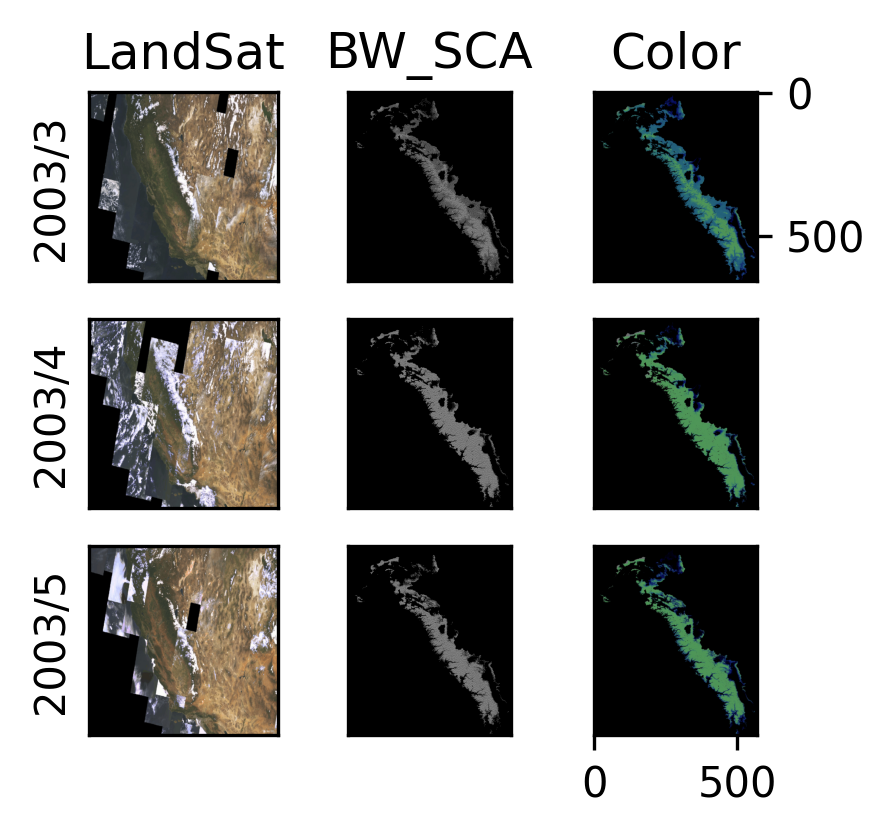

In [21]:
import matplotlib.pyplot as plt
from PIL.Image import Image as PilImage
image_cols=['Landsat_Image','BW_SCA_Image','Color_SCA_Image']
image_cols_abbrev=['LandSat','BW_SCA','Color']
height=168
width=3
bigf=plt.figure(figsize=(width, height),dpi=300)
#bigf.tight_layout()
cid=0
desired_indices=[2,3,4]
for index, row in pdata.iterrows():
    if(not(index in desired_indices)):
        continue
    for i in range(len(image_cols)):
        ic=image_cols[i]
        computed_place=cid+1
        #print(f"index={index}, i={i} ic={ic} computed_place={computed_place}")
        data_for_an_img=row[ic]
        fig=plt.subplot(168,3,computed_place)
        y_axis_name=str(row['Year'])+"/"+str(row['Month'])
        if(i==0):
            fig.set_ylabel(y_axis_name)
        if(index==desired_indices[0] and i>=0):
            #title on top row
            fig.set_title(image_cols_abbrev[i])
            if(i==2):
                fig.tick_params(left=False,bottom=False,labelleft=False,
                                labelbottom=False,right=True,labelright=True)
            else:
                fig.tick_params(left=False,
                    bottom=False,
                    labelleft=False,
                    labelbottom=False)            
        else:
            fig.tick_params(left=False,
                bottom=False,
                labelleft=False,
                labelbottom=False)
            if(index==desired_indices[-1] and i==2):
                fig.tick_params(left=False,
                    bottom=True,
                    labelleft=False,
                    labelbottom=True)               
        plt.imshow(data_for_an_img)
        cid=cid+1
print(f"cid={cid}")    

In [22]:
#plot all landsat
height=168
width=1
plt.figure(figsize=(width, height))
for index, row in pdata.iterrows():
    computed_place=index+1
    data_for_an_img=row['Landsat_Image']
    #plt.subplot(168,1,index
    
        

<Figure size 72x12096 with 0 Axes>

### LSTM-base-model-1b-bestmodel

In [23]:
file_name = 'data/ca_grace_all_plus_offset.csv'
osdata=pd.read_csv(file_name)

In [24]:
osdata.head()


,month,snowcap,snowcap_offset_1,snowcap_bw_offset_1,snowcap_offset_3,snowcap_bw_offset_3,snowcap_offset_1.1,snowcap_offset_3.1,snowcap_bw,snowcap_avg,...,sfmc,runoff,capac,catdef,Snowf,rzexc,RainfC,rzmc,prmc,evap
0,1.0,2.979813e+11,2.977106e+11,53561.0,2.996800e+11,973276.0,2.977106e+11,2.996800e+11,294585.0,9.612301e+09,...,176.212138,621.445111,10.807113,308444.087,76.347303,707.258484,17.374478,194.840829,198.172161,644.21295
1,2.0,2.835708e+11,2.979813e+11,294585.0,2.883365e+11,104036.0,2.979813e+11,2.883365e+11,19185627.0,1.012753e+10,...,191.026888,546.750853,11.538916,284341.677,315.991364,562.804908,87.382864,207.005523,211.130071,980.11345
2,3.0,3.262106e+11,2.835708e+11,19185627.0,2.977106e+11,53561.0,2.835708e+11,2.977106e+11,39522095.0,1.052292e+10,...,183.253912,554.630849,13.538214,279964.037,174.247548,29.251186,60.586443,207.414268,212.279017,1406.39418
3,4.0,3.253270e+11,3.262106e+11,39522095.0,2.979813e+11,294585.0,3.262106e+11,2.979813e+11,53739475.0,1.084423e+10,...,177.384923,757.990836,21.185279,284377.606,520.646940,-158.552112,125.486875,203.518637,208.689142,1582.06131
4,5.0,3.315039e+11,3.253270e+11,53739475.0,2.835708e+11,19185627.0,3.253270e+11,2.835708e+11,46363941.0,1.069367e+10,...,158.130730,328.847681,11.066942,289032.203,138.852295,-1563.033878,69.069734,198.297260,204.062225,2021.60086


In [25]:
osdata.shape

(168, 25)

####  From LSTM-base-model-1b-bestmodel, sort the catdef data and get a preview ; also see where 308444.087 falls

In [26]:
osdata[osdata['catdef']==308444.087][['month','catdef']]

,month,catdef
0,1.0,308444.087


In [27]:
lstm_sorted_catdef=sorted(osdata['catdef'].tolist())
print(json.dumps(lstm_sorted_catdef[:5],indent=4))

[
    233208.92,
    238432.183,
    242260.89900000003,
    249886.867,
    250985.262
]


#### Now, from "all_data.pkl" get a sum of catdata for each row

In [28]:
cat_data_sums_sums=list()
cat_data_sums_months=list()
cat_data_sums_years=list()
for index, row in pdata.iterrows():
    cat_data_sums_months.append(row['Month'])
    cat_data_sums_years.append(row['Year'])
    catdef_arr=row['catdef'].flatten()
    catdef_non_nan=[c for c in catdef_arr if not math.isnan(c)]
    catdef_non_nan_sum=sum(catdef_non_nan)
    cat_data_sums_sums.append(catdef_non_nan_sum)
sums_dict={
    'Year':cat_data_sums_years,
    'Month': cat_data_sums_months,
    'CatDefSum':cat_data_sums_sums    
}
catdef_sums_df=pd.DataFrame.from_dict(sums_dict)
catdef_sums_df.head()

,Year,Month,CatDefSum
0,2003,1,314149.780
1,2003,2,290470.223
2,2003,3,285315.834
3,2003,4,290020.228
4,2003,5,294718.503


In [29]:
catdef_sums_df[catdef_sums_df.apply(
    lambda row:300000<row['CatDefSum'] and row['CatDefSum']<315000,axis=1)].sort_values('CatDefSum')


,Year,Month,CatDefSum
51,2007,4,300132.805
15,2004,4,300561.382
74,2009,3,300764.750
61,2008,2,301101.720
88,2010,5,301321.167
111,2012,4,304165.975
48,2007,1,304544.673
101,2011,6,305304.360
13,2004,2,306912.638
85,2010,2,307955.361


####  Now, explore "disc_snow.csv" !

In [30]:
disc_snow_df=pd.read_csv('data/disc_snow.csv')

In [31]:
disc_snow_df.columns

Index(['month', 'discharge', 'snowcap'], dtype='object')

In [32]:
disc_snow_df[disc_snow_df.apply(lambda row:308000<row['discharge'] and row['discharge']<309000,axis=1)]

,month,discharge,snowcap
0,1.0,308444.087,2.979813e+11
52,5.0,308654.500,3.296559e+11


In [33]:
disc_snow_df[disc_snow_df.apply(lambda row:308443<row['discharge'] and row['discharge']<308445,axis=1)]

,month,discharge,snowcap
0,1.0,308444.087,2.979813e+11


# SIERRA

In [34]:
import h5py

In [35]:
h5_file="./data/SIERRA_NEVADA/v0/SCA/SN_SCA_WY2010.h5"
import os
os.system("stat "+h5_file)

  File: ./data/SIERRA_NEVADA/v0/SCA/SN_SCA_WY2010.h5
  Size: 631833581 	Blocks: 1234056    IO Block: 4096   regular file
Device: 821h/2081d	Inode: 145497586   Links: 1
Access: (0664/-rw-rw-r--)  Uid: ( 1000/ UNKNOWN)   Gid: ( 1000/ UNKNOWN)
Access: 2022-02-25 00:54:38.643806254 +0000
Modify: 2022-02-25 00:54:35.735811864 +0000
Change: 2022-02-25 00:54:35.735811864 +0000
 Birth: -


0

In [36]:
data_2010 = h5py.File(h5_file, 'r')

In [37]:
data_2010.keys()

<KeysViewHDF5 ['SCA', 'lat', 'lon']>

In [38]:
#sca_2010 = np.array(data_2010['SCA'])

#### Extract Catdef for ARIMA

In [39]:
extraction_dir="catdef_extraction"
os.system("mkdir -v "+extraction_dir)

mkdir: cannot create directory ‘catdef_extraction’: File exists


256

In [40]:
catdef_dims=pdata.apply(lambda row:row['catdef'].shape,axis=1).tolist()[0]


In [41]:
catdef_dims

(33, 37)

In [42]:
regen=False
if(regen):
    for row_idx in range(catdef_dims[0]):
        print(f"row is {row_idx} of {catdef_dims[0]} ...")
        for col_idx in range(catdef_dims[1]):
            the_header=f"catdef_row.{row_idx}.col.{col_idx}"
            csv_target=f"{extraction_dir}/catddef.{the_header}.csv"
            the_data=pdata.apply(lambda row:row['catdef'].item((row_idx,col_idx)),axis=1).tolist()
            #print("the_data len is "+str(len(the_data)))
            #print(f"The target {csv_target}")
            temp_df=pd.DataFrame.from_dict({the_header:the_data})
            temp_df.to_csv(csv_target,index=False)
            #break
        #break

## Monthly Range Information/EDA

In [66]:
def getCatDefSeriesAtRowCol(row_idx,col_idx):
    the_data=pdata.apply(lambda row:row['catdef'].item((row_idx,col_idx)),axis=1).tolist()
    return the_data
def getMonthTuples(data,tup_len=6):
    if(tup_len>len(data)):
        return None
    else:
        for start_idx in range(len(data)):
            #print(f"start_idx is {start_idx}")
            end_idx=start_idx+tup_len
            if(end_idx>=len(data)):
                break
            the_tup=data[start_idx:end_idx]
            yield the_tup
def getMMM(data):
    return [min(data),np.mean(data),max(data)]

In [67]:
print("all :"+str(getCatDefSeriesAtRowCol(0,4)[:10]))
getMonthTuples(getCatDefSeriesAtRowCol(0,4))

all :[58.863, 79.32600000000001, 80.846, 74.34, 103.3, 192.99, 254.26, 308.64, 324.23, 332.66]


<generator object getMonthTuples at 0x7fa473a94c10>

In [68]:
def getMMM(data):
    return [min(data),np.mean(data),max(data)]

In [73]:
def getCDSeriesMMM(row_idx,col_idx,tup_len=6):
    the_data=getCatDefSeriesAtRowCol(row_idx,col_idx)
    the_tups=list()
    for tup in getMonthTuples(the_data,tup_len):
        the_tups.append(tup)
    tups_mmm=[getMMM(t) for t in the_tups]
    df_dict={'min':[t[0] for t in tups_mmm],
             'mean':[t[1] for t in tups_mmm],
             'max':[t[2] for t in tups_mmm]}
    cds_df=pd.DataFrame.from_dict(df_dict)
    return cds_df
mmm_df=getCDSeriesMMM(0,4)

In [79]:
#!pip3 install seaborn

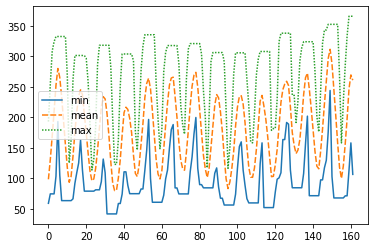

In [85]:
import seaborn as sns
sns.lineplot(data=mmm_df)
#place legend in center right of plot
plt.legend(loc='center left')

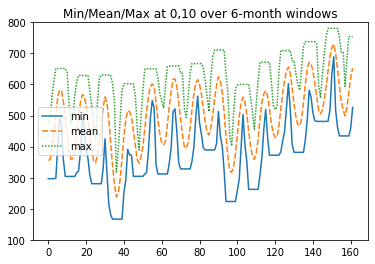

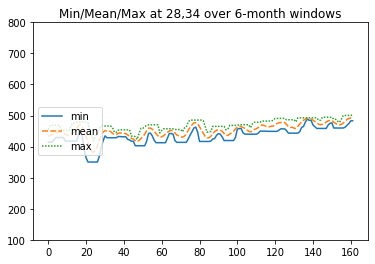

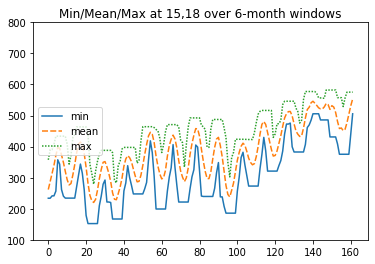

In [120]:
locs=[[0,10],[28,34],[15,18]]
for l in locs:
    mdf=getCDSeriesMMM(l[0],l[1])
    plt.figure()
    plt.ylim(100, 800)
    p_title=f"Min/Mean/Max at {l[0]},{l[1]} over 6-month windows"
    sns.lineplot(data=mdf).set(title=p_title)
    #place legend in center right of plot
    plt.legend(loc='center left')

### Measurements Looking

In [91]:
measurements_df=pd.read_csv('measurements.csv')

In [92]:
measurements_df.columns

Index(['SITE_CODE', 'WLM_ID', 'MSMT_DATE', 'WLM_RPE', 'WLM_GSE', 'GWE',
       'GSE_GWE', 'WLM_QA_DESC', 'WLM_DESC', 'WLM_ACC_DESC', 'WLM_ORG_NAME',
       'COOP_ORG_NAME', 'MONITORING_PROGRAM', 'MSMT_CMT'],
      dtype='object')

In [126]:
site_codes_freq=measurements_df['SITE_CODE'].value_counts()
site_codes_freq_names=measurements_df['SITE_CODE'].value_counts().index.tolist()



In [128]:
print(f"shape counts {site_codes_freq.shape}")
print(f"shape counts names {len(site_codes_freq_names)}")

shape counts (44094,)
shape counts names 44094


In [134]:
site_code_counts_df=pd.DataFrame.from_dict({
    'SITE_CODE':site_codes_freq_names,
    'SITE_CODE_COUNT': site_codes_freq
})
site_code_counts_df.reset_index(drop=True, inplace=True)

In [135]:
site_code_counts_df.head()

,SITE_CODE,SITE_CODE_COUNT
0,369839N1219679W001,25024
1,344313N1192967W001,16304
2,344552N1192868W001,16198
3,384090N1228023W001,13097
4,365837N1180151W002,12658


In [136]:
site_code_counts_df.tail()

,SITE_CODE,SITE_CODE_COUNT
44089,353094N1179601W001,1
44090,353091N1179599W001,1
44091,353091N1179204W001,1
44092,374043N1210229W001,1
44093,348608N1182474W001,1


(array([ 6.,  6.,  6.,  4., 10., 16.,  6.,  3.,  3.,  4.,  7.,  0.,  4.,
         2.,  2.,  4.,  1.,  1.,  1.,  0.,  2.,  0.,  0.,  1.,  0.,  0.,
         1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         2.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  1.,  0.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1454. ,  1689.7,  1925.4,  2161.1,  2396.8,  2632.5,  2868.2,
         3103.9,  3339.6,  3575.3,  3811. ,  4046.7,  4282.4,  4518.1,
         4753.8,  4989.5,  5225.2,  5460.9,  5696.6,  5932.3,  6168. ,
         6403.7,  6639.4,  6875.1,  7110.8,  7346.5,  7582.2,  7817.9,
         8053.6,  8289.3,  8525. ,  8760.7,  8996.4,  9232.1,  9467.8,
         9703.5,  9939.2, 10174.9, 10410.6, 10646.3, 10882. , 11117.7,
        

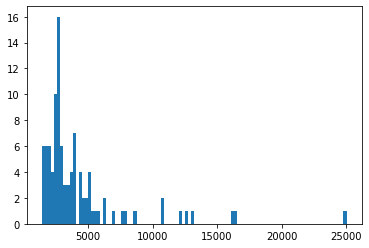

In [149]:
plt.hist(site_code_counts_df['SITE_CODE_COUNT'].head(100),bins=100)

In [138]:
codes_of_note=site_code_counts_df[site_code_counts_df['SITE_CODE_COUNT']>=168]['SITE_CODE']
codes_of_note.shape

(2705,)

In [194]:
def getDatesForSiteCode(sc):
    return measurements_df[measurements_df['SITE_CODE']==sc]['MSMT_DATE'].tolist()
test_site_code='348608N1182474W001'
test_site_codes_dates=getDatesForSiteCode(test_site_code)
from datetime import datetime
def convertMeasDataToDTO(md):
    #2009-05-01 00:00:00
    #'Jun 1 2005  1:33PM', '%b %d %Y %I:%M%p')
    datetime_object=None
    try:
        datetime_object = datetime.strptime(md,'%Y-%m-%d %H:%M:%S')
    except ValueError:
        datetime_object = datetime.strptime(md,'%Y-%m-%d')
    return datetime_object
print(f"For site code {test_site_code}, its dates are {test_site_codes_dates}")
dtos=[convertMeasDataToDTO(cd) for cd in getDatesForSiteCode(test_site_code)]
print(str(dtos))
    

For site code 348608N1182474W001, its dates are ['1986-02-06 00:00:00']
[datetime.datetime(1986, 2, 6, 0, 0)]


In [195]:
site_code_counts_df[site_code_counts_df['SITE_CODE_COUNT']==3].head()

,SITE_CODE,SITE_CODE_COUNT
31851,346242N1172057W001,3
31852,370207N1198516W001,3
31853,337134N1170423W001,3
31854,347897N1172996W001,3
31855,327892N1145483W001,3


In [196]:
def getDiffsOfDTOFromWellID(wid,get_days=True):
    the_dates=getDatesForSiteCode(wid)
    dtos=[convertMeasDataToDTO(d) for d in the_dates]
    #print(f"dtos is {dtos}")
    sorted_dtos=sorted(dtos,reverse=False)
    #it seems this sorting doesn't even work?!?!?!?!?!
    #print(f"sorted dtos is {sorted_dtos}")
    #now, the datetimes are ordered from oldest to most recent(reverse=False) (default)
    #now, the datetimes are ordered from most recent to oldest (reverse=True)
    if(len(dtos)<2):
        return []
    diffs=[sorted_dtos[i+1]-sorted_dtos[i] for i in range(len(sorted_dtos)) if i+1<len(sorted_dtos)]
    if(get_days):
        diffs=[d.days for d in diffs]
    return diffs
    
test_code='346242N1172057W001'
the_diffs=getDiffsOfDTOFromWellID(test_code)
print(f"the diffs {the_diffs}")
the_diffs

the diffs [363, 323]


[363, 323]

In [197]:
def getCountFreqVsDiffSumm(wid):
    count_freq=site_code_counts_df[site_code_counts_df['SITE_CODE']==wid]['SITE_CODE_COUNT'].tolist()[0]
    diffs=getDiffsOfDTOFromWellID(wid)
    sum_keys=['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max']
    diffs_df=pd.DataFrame.from_dict({'d':diffs})
    diffs_desc_df=diffs_df['d'].describe()
    main_dict=dict()
    main_dict=dict({'SITE_CODE':[wid]})
    for k in sum_keys:
        main_dict['DIFF_'+k.upper()]=[diffs_desc_df[k]]
    #print(str(json.dumps(main_dict,indent=4)))
    diff_df=pd.DataFrame.from_dict(main_dict)
    return diff_df
dd=getCountFreqVsDiffSumm(test_code)
dd

,SITE_CODE,DIFF_COUNT,DIFF_MEAN,DIFF_STD,DIFF_MIN,DIFF_25%,DIFF_50%,DIFF_75%,DIFF_MAX
0,346242N1172057W001,2.0,343.0,28.284271,323.0,333.0,343.0,353.0,363.0


In [198]:
min_sid_freq_val=200
sidsOfInterest=site_code_counts_df[site_code_counts_df['SITE_CODE_COUNT']>=min_sid_freq_val]['SITE_CODE'].tolist()
print(f"Found {len(sidsOfInterest)} site codes with at least {min_sid_freq_val} records!")

Found 2059 site codes with at least 200 records!


In [201]:
#Frame = Frame.append(pandas.DataFrame(data = SomeNewLineOfData), ignore_index=True)
main_df=None
for site_code in sidsOfInterest:
    if(main_df is None):
        main_df=getCountFreqVsDiffSumm(site_code)
    else:
        temp_df=getCountFreqVsDiffSumm(site_code)
        main_df=pd.concat([main_df,temp_df])
        main_df.reset_index(drop=True, inplace=True)

In [202]:
main_df

,SITE_CODE,DIFF_COUNT,DIFF_MEAN,DIFF_STD,DIFF_MIN,DIFF_25%,DIFF_50%,DIFF_75%,DIFF_MAX
0,369839N1219679W001,25023.0,0.076130,7.283364,0.0,0.0,0.0,0.0,1141.0
1,344313N1192967W001,16303.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,344552N1192868W001,16197.0,0.971723,8.533132,0.0,0.0,0.0,0.0,342.0
3,384090N1228023W001,13096.0,0.569105,5.875308,0.0,0.0,0.0,1.0,275.0
4,365837N1180151W002,12657.0,0.345817,0.991564,0.0,0.0,0.0,1.0,80.0
...,...,...,...,...,...,...,...,...,...
2054,389641N1220620W001,199.0,124.296482,92.833986,1.0,31.0,153.0,192.5,610.0
2055,388593N1214885W001,199.0,46.708543,27.035433,0.0,30.0,39.0,61.0,181.0
2056,365766N1197904W001,199.0,118.839196,126.489646,28.0,31.0,61.0,168.5,851.0
2057,341200N1191065W003,199.0,55.261307,428.407578,1.0,14.0,25.0,32.0,6064.0


[Text(0.5, 1.0, 'Consider All Sites')]

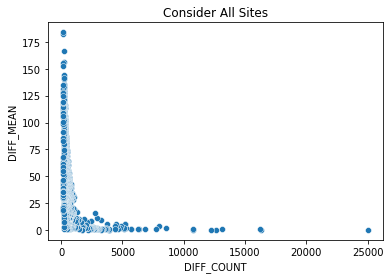

In [208]:
sns.scatterplot(x=main_df['DIFF_COUNT'],y=main_df['DIFF_MEAN']).set(title='Consider All Sites')

[Text(0.5, 1.0, 'Consider Sites w/Counts<=5000')]

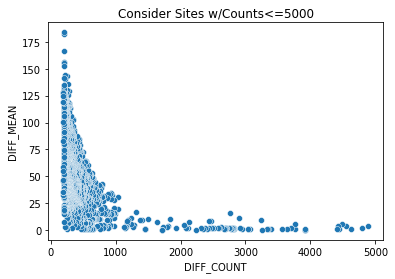

In [209]:
partial_df=main_df[main_df['DIFF_COUNT']<=5000]
sns.scatterplot(x=partial_df['DIFF_COUNT'],y=partial_df['DIFF_MEAN']).set(title='Consider Sites w/Counts<=5000')

In [320]:
def isYearALeapYear(y):
    m4=y%4
    #2020 is a leap year
    mr=2020%4
    if(mr==m4):
        #if 2020 and y are mod4 equivalent then y is a leap year
        return True
    else:
        return False
def getFirstDayOfMonth(m):
    return 1


def getLastDayOfMonth(m,y):
    #1-based indexing !
    #31-day months
    toms=[1,3,5,7,8,10,12]
    #30-day months
    tms=[4,6,9,11]
    if(m in toms):
        return 31
    elif(m in tms):
        return 30
    elif(m==2):
        isLeap=isYearALeapYear(y)
        if(isLeap):
            return 29
        else:
            return 28
    else:
        raise Exception(f"Unknown month {m} ; month is 1-based indexing!")

def generatePickleRanges():
    start_p_year=2003
    end_p_year=2016
    pkl_yrs=range(start_p_year,end_p_year+1)
    pkl_mons=range(1,12+1)
    pickle_starts=list()
    pickle_ends=list()
    for pickle_year in pkl_yrs:
        for pickle_month in pkl_mons:
            first_day=getFirstDayOfMonth(pickle_month)
            last_day=getLastDayOfMonth(pickle_month,pickle_year)
            f_dto=datetime(pickle_year, pickle_month, first_day)
            l_dto=datetime(pickle_year, pickle_month, last_day,
                                    hour=23, minute=59, second=59, microsecond=999999)
            pickle_starts.append(f_dto)
            pickle_ends.append(l_dto)
    return [pickle_starts,pickle_ends]

def isThisDTOInRange(dto,start_range,end_range):
    if(start_range<=dto and dto<=end_range):
        return True
    return False


def doesSiteHaveDataForEachMonthOfPkl(site_code,pickle_ranges,debug=False):
    #get the dates for this site
    the_rows=measurements_df[measurements_df['SITE_CODE']==site_code]
    the_dates=the_rows['MSMT_DATE'].tolist()
    mdtos=[convertMeasDataToDTO(d) for d in the_dates]
    #now we have datetime objects for the dates of the site
    
    #the pickle ranges have start/stop for each month
    
    #to see if each month is covered, ...

    #first if there are less than 168 MSMT_DATE, then no
    if(len(the_dates)<168):
        return False
    
    #next sort the measurement times (oldest to most_recent)
    pickle_ranges_starts=pickle_ranges[0]
    pickle_ranges_ends=pickle_ranges[1]
    mdtos=sorted(mdtos)
    #compare the oldest and most recent of this site's dates
    # to the starts/ends of the pickle data and make sure there is 
    # 100% coverage
    oldestSiteDateBeforePickle=mdtos[0]<=pickle_ranges_starts[0]
    newestSiteDateAfterPickle=mdtos[-1]>=pickle_ranges_ends[-1]
    if(not(oldestSiteDateBeforePickle and newestSiteDateAfterPickle)):
        return False
    
    #now that there is 100% coverage assured, verify that each month is actually covered
    coveredFlags=list()
    for p in range(len(pickle_ranges_starts)):
        this_month_covered=False
        rows_of_interest=rows_to_get_avg_of=the_rows[the_rows.apply(lambda row:isThisDTOInRange(convertMeasDataToDTO(row['MSMT_DATE']),pickle_ranges_starts[p],pickle_ranges_ends[p]),axis=1)]
        values_of_interest=rows_of_interest['GSE_GWE'].tolist()
        if(not(all([np.isnan(w) for w in values_of_interest]))):
            this_month_covered=True
        if(debug):
            print(f"for month {pickle_ranges_starts[p]} coverage status for {site_code} is {this_month_covered}")
        coveredFlags.append(this_month_covered)    
        #for dto in mdtos:
        #    c=isThisDTOInRange(dto,pickle_ranges_starts[i],pickle_ranges_ends[i])
        #    if(c):
        #        this_month_covered=True
        #        break
        coveredFlags.append(this_month_covered)
    if(all(coveredFlags)):
        return True
    return False
    
    
    


In [322]:
print(f"For site code 344131N1185635W001, the coverage status is {doesSiteHaveDataForEachMonthOfPkl('344131N1185635W001',pickle_ranges)}")

For site code 344131N1185635W001, the coverage status is False


In [323]:
site_codes_to_consider=main_df[main_df['DIFF_COUNT']>=169]['SITE_CODE'].tolist()
print(f"{len(site_codes_to_consider)} site codes to consider!")

2059 site codes to consider!


In [324]:
pickle_ranges=generatePickleRanges()
covered_site_codes=list()
for sci in range(len(site_codes_to_consider)):
    if(sci%100==0):
        print(f"On code {sci} of {len(site_codes_to_consider)}")
    site_code=site_codes_to_consider[sci]
    if(doesSiteHaveDataForEachMonthOfPkl(site_code,pickle_ranges)):
        covered_site_codes.append(site_code)

On code 0 of 2059
On code 100 of 2059
On code 200 of 2059
On code 300 of 2059
On code 400 of 2059
On code 500 of 2059
On code 600 of 2059
On code 700 of 2059
On code 800 of 2059
On code 900 of 2059
On code 1000 of 2059
On code 1100 of 2059
On code 1200 of 2059
On code 1300 of 2059
On code 1400 of 2059
On code 1500 of 2059
On code 1600 of 2059
On code 1700 of 2059
On code 1800 of 2059
On code 1900 of 2059
On code 2000 of 2059


In [325]:
print(f"{len(covered_site_codes)} site codes found!")

36 site codes found!


In [326]:
info_df_about_covered_sites=main_df[main_df.apply(lambda row:row['SITE_CODE'] in covered_site_codes,axis=1)].sort_values('DIFF_COUNT')
info_df_about_covered_sites.reset_index(inplace=True,drop=True)
info_df_about_covered_sites

,SITE_CODE,DIFF_COUNT,DIFF_MEAN,DIFF_STD,DIFF_MIN,DIFF_25%,DIFF_50%,DIFF_75%,DIFF_MAX
0,373177N1219435W005,223.0,31.385650,9.805504,6.0,29.0,31.0,31.00,122.0
1,373177N1219435W004,224.0,31.236607,9.907297,6.0,29.0,31.0,31.00,122.0
2,373177N1219435W002,225.0,31.884444,14.180752,6.0,29.0,31.0,31.00,177.0
3,373177N1219435W001,225.0,31.884444,14.168154,6.0,29.0,31.0,31.00,177.0
4,373177N1219435W003,225.0,31.884444,14.186103,6.0,29.0,31.0,31.00,177.0
5,369760N1218695W001,270.0,30.770370,3.278727,28.0,30.0,31.0,31.00,61.0
6,353693N1192870W001,309.0,30.533981,1.919562,28.0,30.0,31.0,31.00,61.0
7,353890N1191471W001,309.0,30.533981,1.919562,28.0,30.0,31.0,31.00,61.0
8,340033N1170693W001,318.0,30.924528,4.635002,25.0,30.0,31.0,31.00,92.0
9,340090N1170648W001,321.0,30.635514,2.592269,25.0,30.0,31.0,31.00,61.0


In [327]:
stations_df=pd.read_csv('stations.csv')

In [333]:
def getLLOfFromSID(sid):
    station_row=stations_df[stations_df['SITE_CODE']==sid]
    if(station_row.shape[0]!=1):
        raise Exception(f"invalid site code {sid}")
    slat=station_row['LATITUDE'].tolist()[0]
    slon=station_row['LONGITUDE'].tolist()[0]
    return [slat,slon]
getLLOfFromSID('373177N1219435W005')


[37.3177, -121.943]

In [334]:
from math import sin, cos, sqrt, atan2, radians
def getLLDist(lat1,lon1,lat2,lon2):
    #https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude
    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(abs(lat1))
    lon1 = radians(abs(lon1))
    lat2 = radians(abs(lat2))
    lon2 = radians(abs(lon2))

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

In [341]:
def getRowColOfPklLatLonNearest(lat_matrix,lon_matrix,scll):
    num_lat_rows=lat_matrix.shape[0]
    num_lat_cols=lat_matrix.shape[1]
    assert lat_matrix.shape==lon_matrix.shape
    dists=np.zeros(lat_matrix.shape)
    for row_idx in range(num_lat_rows):
        for col_idx in range(num_lat_cols):
            pkl_lat=lat_matrix[row_idx,col_idx]
            pkl_lon=lon_matrix[row_idx,col_idx]
            lldist=getLLDist(pkl_lat,pkl_lon,scll[0],scll[1])
            #getLLDist(lat1,lon1,lat2,lon2):
            #lldist=math.sqrt(
            #    math.pow(pkl_lat-scll[0],2)+
            #    math.pow(pkl_lon-scll[0],2)
            #    )
            dists[row_idx,col_idx]=lldist
    min_dist_km=np.amin(dists)
    min_dist_loc=np.where(dists == min_dist_km)
    min_dist_row=min_dist_loc[0][0]
    min_dist_col=min_dist_loc[1][0]
    #print(f"EDDIE : {min_dist_row},{min_dist_col}")
    return [min_dist_row,min_dist_col,min_dist_km]

In [335]:
getRowColOfPklLatLonNearest(lat_df.to_numpy(),lon_df.to_numpy(),getLLOfFromSID('373177N1219435W005'))

EDDIE : 14,10


[14, 10, 12.543855029768558]

In [336]:
def getSCTimeSeries(site_code,pickle_ranges):
    pickle_ranges_starts=pickle_ranges[0]
    pickle_ranges_ends=pickle_ranges[1]
    sc_rows=measurements_df[measurements_df['SITE_CODE']==site_code]
    sc_rows.reset_index(drop=True,inplace=True)
    monthly_means=list()
    for p in range(len(pickle_ranges_starts)):
        rows_to_get_avg_of=sc_rows[sc_rows.apply(lambda row:isThisDTOInRange(convertMeasDataToDTO(row['MSMT_DATE']),pickle_ranges_starts[p],pickle_ranges_ends[p]),axis=1)]
        monthly_mean=np.mean(rows_to_get_avg_of['GSE_GWE'].tolist())
        if(np.isnan(monthly_mean)):
            print(f"For {site_code}  month {pickle_ranges_starts[p]}, the mean is {monthly_mean} from {rows_to_get_avg_of['GSE_GWE'].tolist()}!")
        monthly_means.append(monthly_mean)
    return monthly_means       
tts=getSCTimeSeries('373177N1219435W005',pickle_ranges)
tts

[66.0,
 63.5,
 60.8,
 58.5,
 56.0,
 55.5,
 57.8,
 61.3,
 63.5,
 65.5,
 66.1,
 63.8,
 58.5,
 56.1,
 55.0,
 54.0,
 55.0,
 56.3,
 59.6,
 62.0,
 65.2,
 68.1,
 67.5,
 64.4,
 61.5,
 59.1,
 57.6,
 54.3,
 52.3,
 51.8,
 54.3,
 55.3,
 58.1,
 58.1,
 59.6,
 57.3,
 56.5,
 54.0,
 52.6,
 50.3,
 48.0,
 49.0,
 50.3,
 53.5,
 55.8,
 57.3,
 58.0,
 57.5,
 57.3,
 57.3,
 57.0,
 57.8,
 60.3,
 61.9,
 65.9,
 67.1,
 68.7,
 69.5,
 70.1,
 70.53,
 70.25,
 69.43,
 68.63,
 69.26,
 70.1,
 71.5,
 73.6,
 75.68,
 78.32,
 80.35,
 81.36,
 81.51,
 80.63,
 79.21,
 76.67,
 75.3,
 75.87,
 76.3,
 76.06,
 75.69,
 74.65,
 73.17,
 70.87,
 69.09,
 67.35,
 65.67,
 64.24,
 63.15,
 61.76,
 62.45,
 64.59,
 65.61,
 65.2,
 65.0,
 64.2,
 63.47,
 61.94,
 61.7,
 60.7,
 58.7,
 58.4,
 58.0,
 58.9,
 60.0,
 61.5,
 61.6,
 60.4,
 57.86,
 55.36,
 53.94,
 53.38,
 52.47,
 52.9,
 53.75,
 55.88,
 58.06,
 59.53,
 60.89,
 62.24,
 61.53,
 60.21,
 59.4,
 59.16,
 59.04,
 61.2,
 62.9,
 64.43,
 67.06,
 69.73,
 70.41,
 72.38,
 73.31,
 72.94,
 73.09,
 73.99,
 

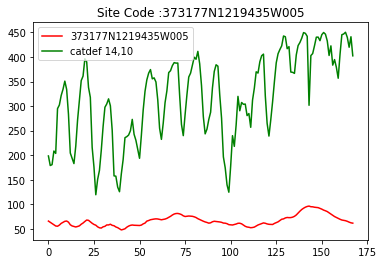

In [349]:
def plotSiteCodeAndNearestPkl(site_code,pickle_ranges):
    #https://stackoverflow.com/questions/22276066/how-to-plot-multiple-functions-on-the-same-figure-in-matplotlib
    t=range(168)
    sc_ts=getSCTimeSeries(site_code,pickle_ranges)
    site_code_ll=getLLOfFromSID(site_code)
    row_col_dist=getRowColOfPklLatLonNearest(lat_df.to_numpy(),lon_df.to_numpy(),site_code_ll)
    pkl_row=row_col_dist[0]
    pkl_col=row_col_dist[1]
    the_cd_series=pdata.apply(lambda row:row['catdef'][pkl_row,pkl_col],axis=1).tolist()
    plt.plot(t, sc_ts, 'r')
    plt.plot(t,the_cd_series,'g')
    plt.title(f"Site Code :{site_code}")
    plt.legend([site_code, f'catdef {pkl_row},{pkl_col}'])
    plt.show()
plotSiteCodeAndNearestPkl('373177N1219435W005',pickle_ranges)

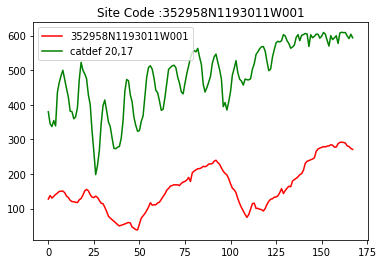

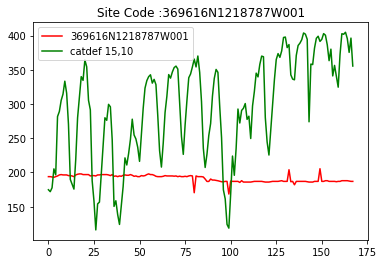

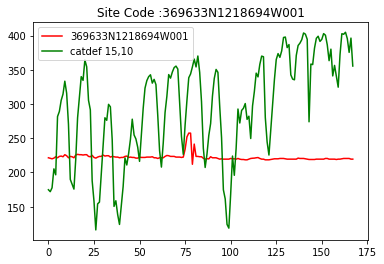

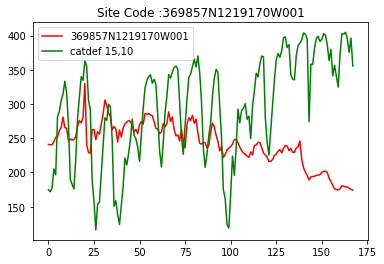

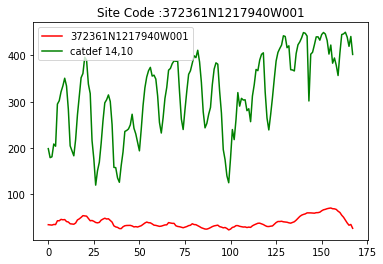

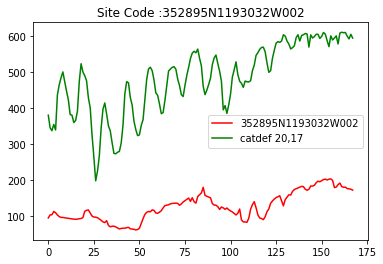

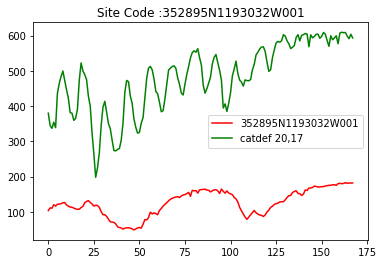

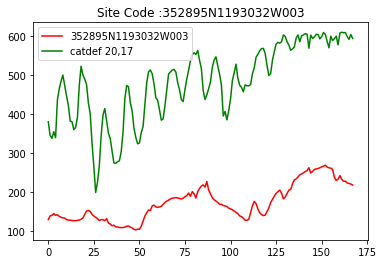

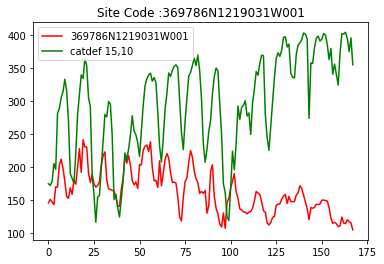

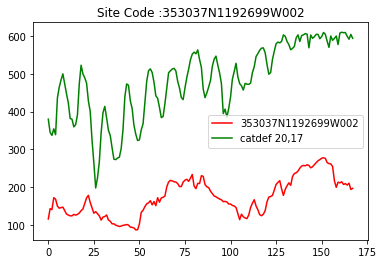

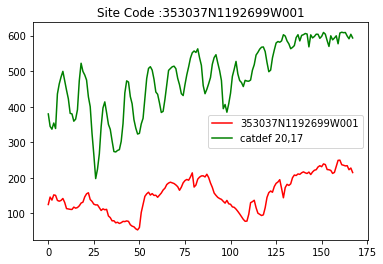

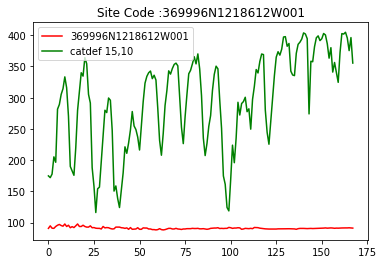

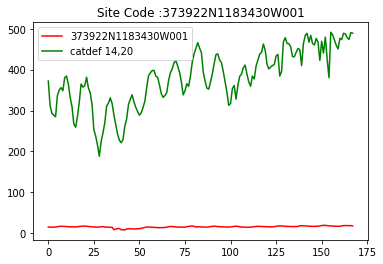

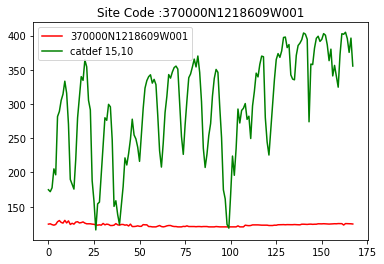

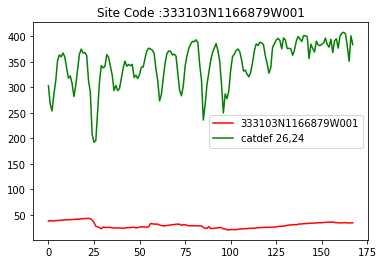

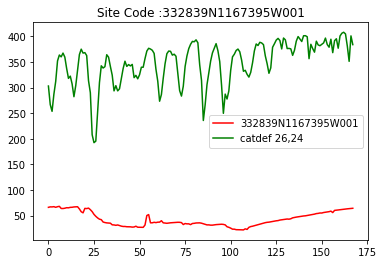

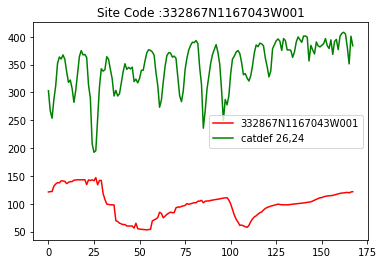

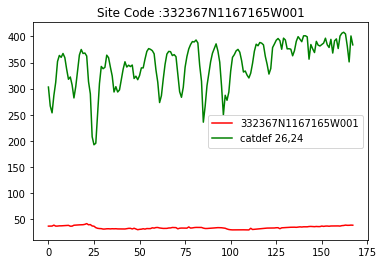

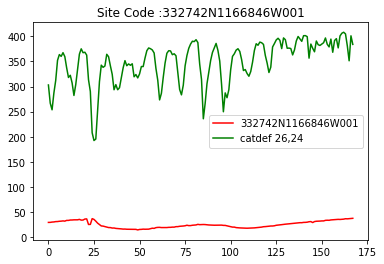

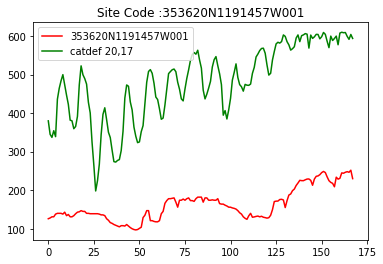

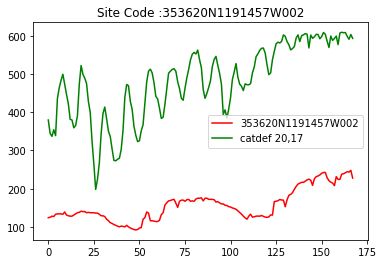

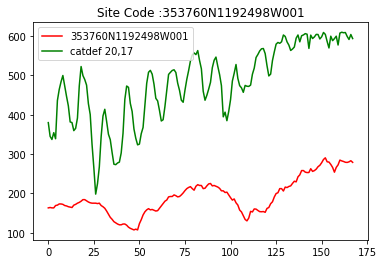

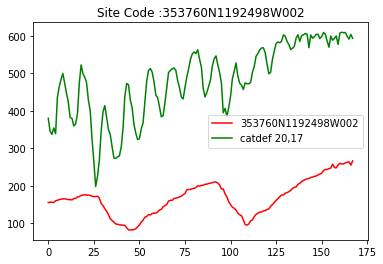

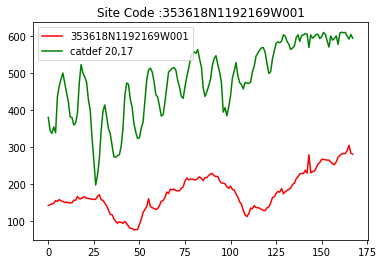

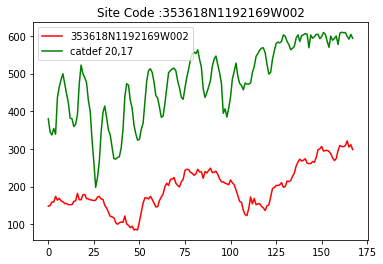

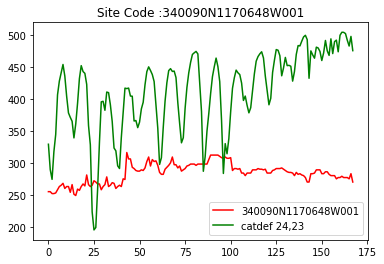

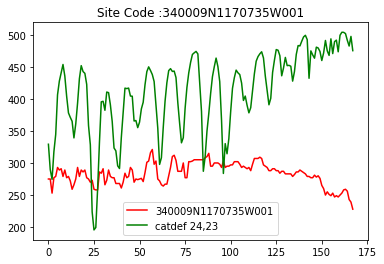

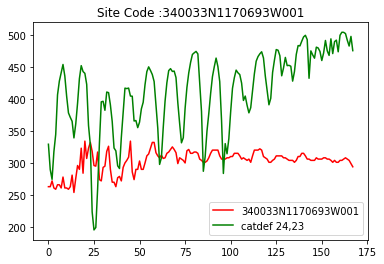

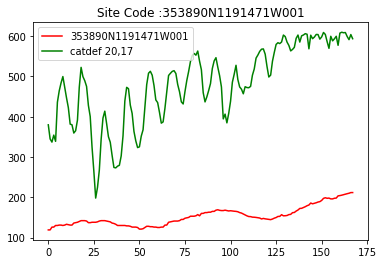

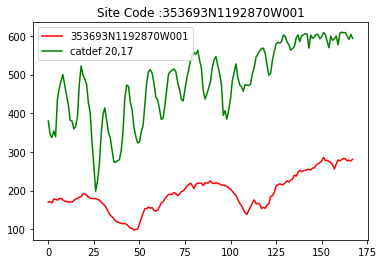

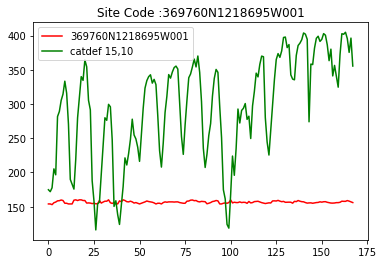

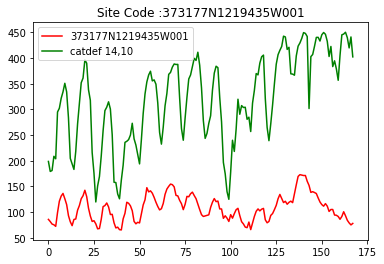

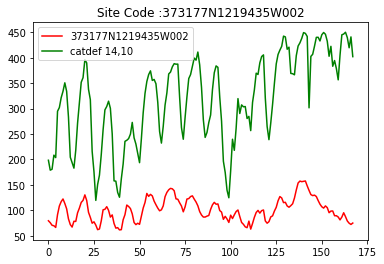

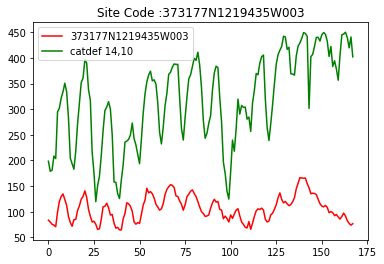

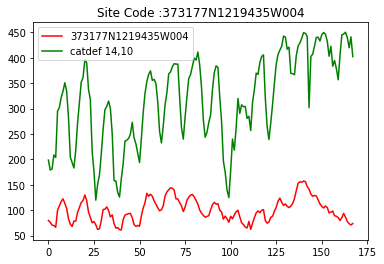

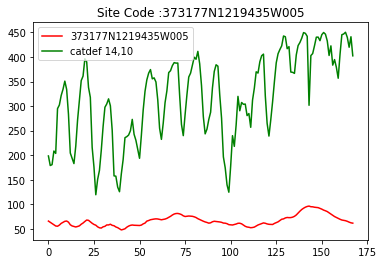

In [350]:
for site_code in covered_site_codes:
    plotSiteCodeAndNearestPkl(site_code,pickle_ranges)

In [361]:
for site_code in covered_site_codes:
    print(str(site_code))

352958N1193011W001
369616N1218787W001
369633N1218694W001
369857N1219170W001
372361N1217940W001
352895N1193032W002
352895N1193032W001
352895N1193032W003
369786N1219031W001
353037N1192699W002
353037N1192699W001
369996N1218612W001
373922N1183430W001
370000N1218609W001
333103N1166879W001
332839N1167395W001
332867N1167043W001
332367N1167165W001
332742N1166846W001
353620N1191457W001
353620N1191457W002
353760N1192498W001
353760N1192498W002
353618N1192169W001
353618N1192169W002
340090N1170648W001
340009N1170735W001
340033N1170693W001
353890N1191471W001
353693N1192870W001
369760N1218695W001
373177N1219435W001
373177N1219435W002
373177N1219435W003
373177N1219435W004
373177N1219435W005
